In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D, Flatten, Dense, Dropout

In [2]:
def show_images(data_generator):
    class_names = list(data_generator.class_indices.keys())
    images , labels = next(data_generator)
    plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

In [3]:
train_dir = "Data/train"
test_dir = "Data/validation"

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    class_mode = 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    class_mode = 'categorical'
)

Found 33600 images belonging to 10 classes.
Found 8400 images belonging to 10 classes.


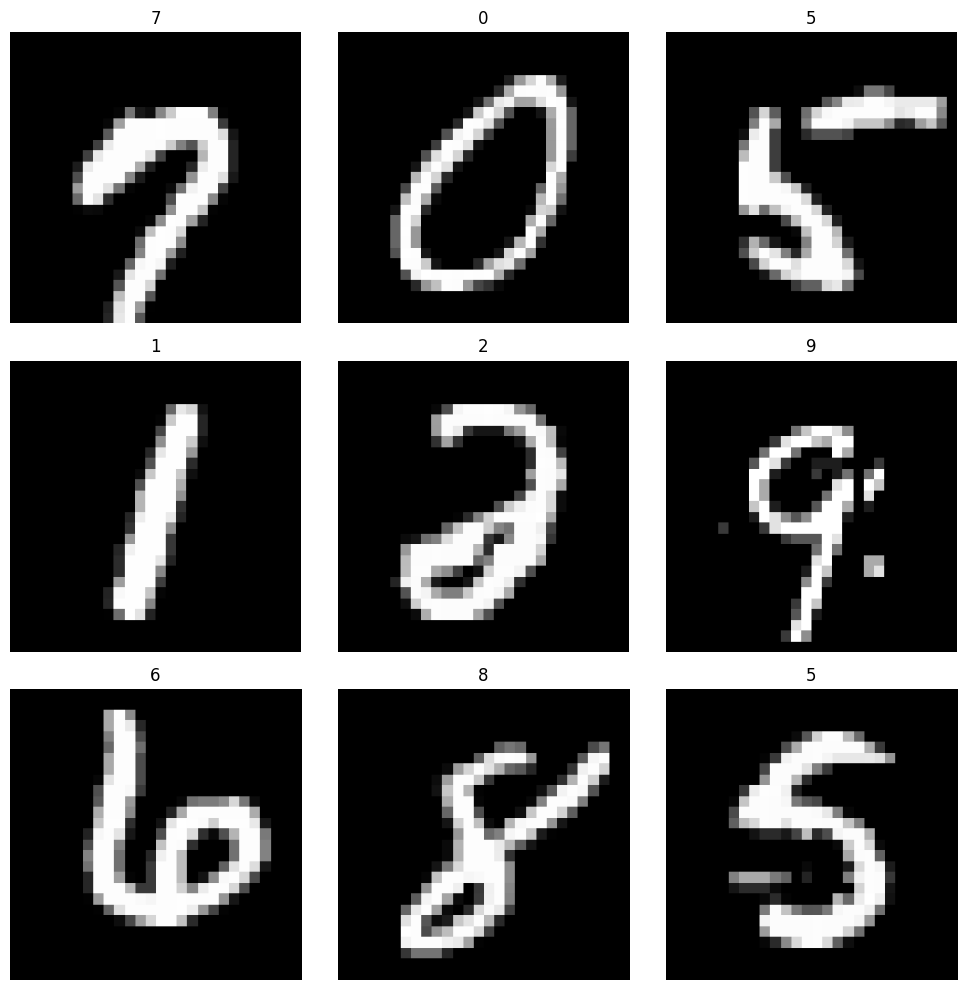

In [5]:
show_images(train_generator)

In [9]:
model = Sequential()

model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes,activation='softmax'))

model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',      # Monitor validation loss
    patience=2,              # Wait 2 epochs before stopping
    restore_best_weights=True # Revert to best model weights
)

In [11]:
history = model.fit(
    train_generator,
    epochs = 10,
    validation_data = test_generator,
    callbacks = [early_stop]
)

c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2391s 2s/step - accuracy: 0.8444 - loss: 0.4906 - val_accuracy: 0.9738 - val_loss: 0.0813
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2045s 2s/step - accuracy: 0.9618 - loss: 0.1309 - val_accuracy: 0.9780 - val_loss: 0.0737
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3063s 3s/step - accuracy: 0.9723 - loss: 0.0877 - val_accuracy: 0.9779 - val_loss: 0.0784
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3719s 4s/step - accuracy: 0.9810 - loss: 0.0591 - val_accuracy: 0.9786 - val_loss: 0.0792


In [12]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 200s 759ms/step - accuracy: 0.9779 - loss: 0.0703
Test Accuracy: 0.9780
Test Loss: 0.0737


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 945ms/step


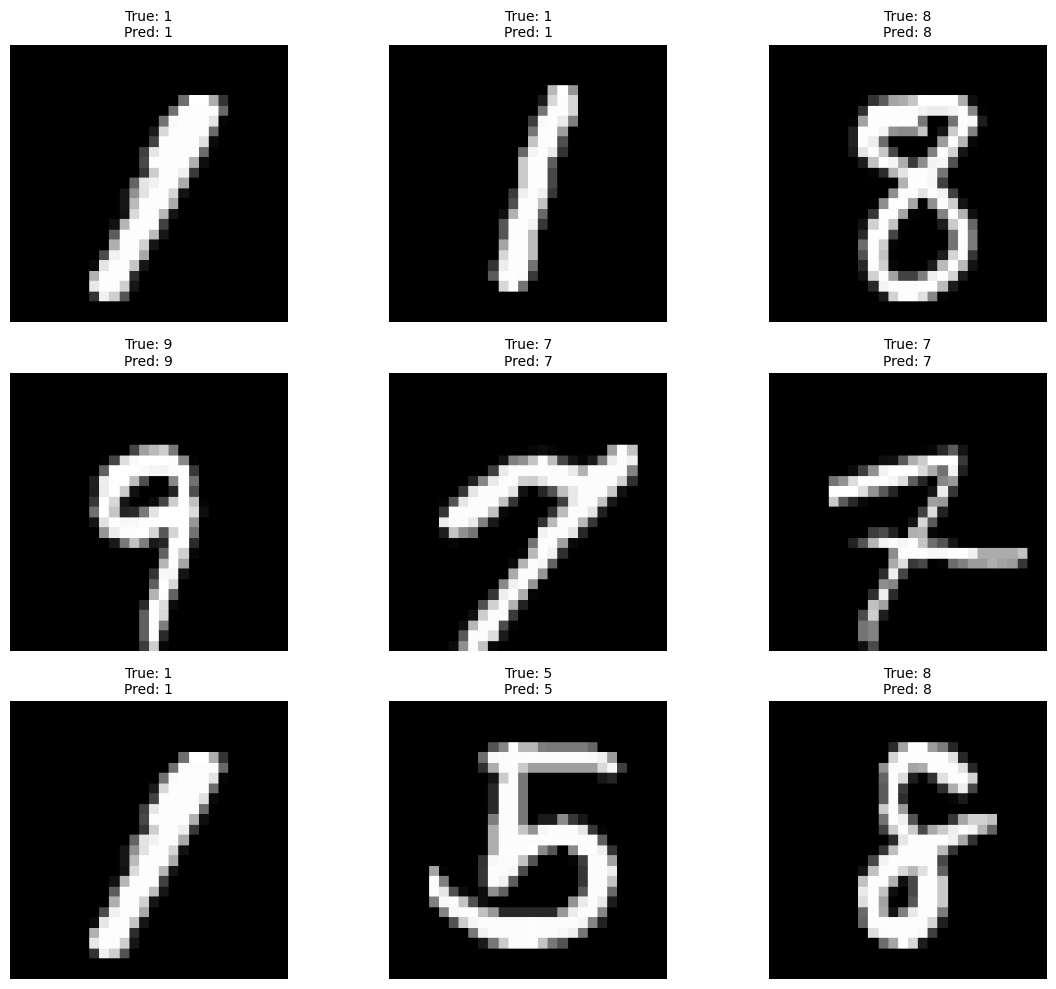

In [13]:
import random
# Get class labels from the generator
class_labels = list(train_generator.class_indices.keys())

# Get a batch of images from the test generator
test_images, test_labels = next(test_generator)

# Get model predictions
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Plot a few random predictions
plt.figure(figsize=(12, 10))
for i in range(9):
    index = random.randint(0, len(test_images) - 1)
    img = test_images[index]
    true_label = class_labels[true_classes[index]]
    predicted_label = class_labels[predicted_classes[index]]
    
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [14]:
# Save the trained model
model.save("models/cnn_digit_recognizer.h5")
print("Model saved successfully.")

Model saved successfully.
